# Convolutional neural network

In [19]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import PIL.Image as Image

# Load the data and set the image size to 32x32 for easier processing
df_train = keras.utils.image_dataset_from_directory("../cifar10/train", image_size=(32, 32))
df_test = keras.utils.image_dataset_from_directory("../cifar10/test", image_size=(32, 32))

class_names = df_train.class_names

# Normalize the data to get the pixel values between 0 and 1 so it's easier for the model to learn
df_train = df_train.map(lambda x, y: (x / 255.0, y))
df_test = df_test.map(lambda x, y: (x / 255.0, y))

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [14]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Initialize the model
model = keras.models.Sequential()

# Add a convolutional layer with 16 filters, each filter is 3x3, activation function is relu
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Pooling is the process of reducing the size of an image by reducing the number of pixels in the image. 
# By taking the maximum value of a 2x2 square of pixels and using that as the new pixel value.

# Add a dropout layer with 20% drop rate which means 20% of the neurons will be turned off during training
model.add(Dropout(0.2))
# A dropout layer is used to prevent overfitting. It randomly turns off a percentage of neurons during training.

# Add a flatten layer which converts the 2D matrix data to a 1D array so that it can be fed to the next layer
model.add(Flatten())

# Add a dense layer with 128 neurons and relu activation function
model.add(Dense(128, activation='relu'))

# A final dense layer with 10 neurons and softmax activation function
model.add(Dense(10, activation='softmax'))
# Both the sigmoid and the softmax are used for classification problems but
# The softmax outputs a probability distribution over the 10 classes of the cifar10 dataset.
# A sigmoid function is used for binary classification problems.

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train, epochs=20, validation_data=df_test)

Epoch 1/20


1563/1563 [==============================] - 20s 13ms/step - loss: 1.5269 - accuracy: 0.4540 - val_loss: 1.2985 - val_accuracy: 0.5420
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2591 - accuracy: 0.5578 - val_loss: 1.2444 - val_accuracy: 0.5622
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1662 - accuracy: 0.5916 - val_loss: 1.1791 - val_accuracy: 0.5832
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0916 - accuracy: 0.6154 - val_loss: 1.1106 - val_accuracy: 0.6092
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0347 - accuracy: 0.6367 - val_loss: 1.1193 - val_accuracy: 0.6095
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9755 - accuracy: 0.6564 - val_loss: 1.0791 - val_accuracy: 0.6247
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9253 - accuracy: 0.6738 - val_loss: 1.1131 - val_accura

In [36]:
# Importing the sample image
img = Image.open("../cnn_test.png")
# Getting the size of the imported image
print(img.size)

(394, 422)


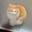

In [37]:
# The image is not the size that the model is expecting so we need to resize it
img_resize = img.resize((32, 32))
img_rgb = img_resize.convert('RGB')
img_array = np.array(img_rgb) / 255.0
img_fin = np.expand_dims(img_array, axis=0)
# We should now have the image in the correct format for the model

img_rgb

In [38]:

# Predicting the class of the image
pred = model.predict(np.array(img_fin))

# The model gets an array of 10 values, each value represents the probability of the image being in that class
# To see the class with the highest probability we can use the argmax function
# To get the class name we can use the class_names attribute of the dataset
print("Predicted class: " ,class_names[np.argmax(pred)])
arr1 = np.array(class_names).reshape(-1, 1)
arr2 = np.array(pred).reshape(-1, 1)
print("\nArray with predictions:\n", np.concatenate((arr1, arr2), axis=1))


1/1 [==============================] - 0s 15ms/step
Predicted class:  dog

Array with predictions:
 [['airplane' '0.0052970382']
 ['automobile' '7.5535136e-05']
 ['bird' '0.009593175']
 ['cat' '0.20961915']
 ['deer' '0.0012613285']
 ['dog' '0.44250014']
 ['frog' '0.053074386']
 ['horse' '0.00020500443']
 ['ship' '0.27759293']
 ['truck' '0.0007813463']]


The model predicts that the image is a dog, which is wrong. The image is a cat.

To improve the model we can add more layers, increase the number of neurons, increase the number of epochs, etc.

This would require more computational power and time than I have available.

In [30]:
# Model accuracy
test_loss, test_acc = model.evaluate(df_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)


313/313 - 1s - loss: 1.3019 - accuracy: 0.6252 - 1s/epoch - 4ms/step

Test accuracy: 0.6251999735832214
Test loss: 1.301902174949646


As we can see the model only has an accuracy of ≈0.63

Which is not great but not too bad either.

Trying this with a random image of a horse i found on the internet it predicts the correct class

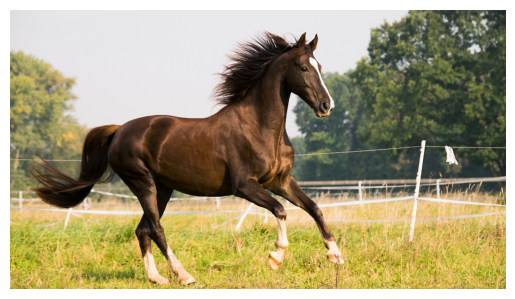

1/1 [==============================] - 0s 15ms/step
Predicted class:  horse

Array with predictions:
 [['airplane' '0.0024691608']
 ['automobile' '4.4858877e-09']
 ['bird' '7.327028e-06']
 ['cat' '0.0002898113']
 ['deer' '0.028207188']
 ['dog' '5.8580017e-06']
 ['frog' '1.9742736e-09']
 ['horse' '0.96851134']
 ['ship' '3.2058537e-08']
 ['truck' '0.0005093902']]


In [53]:
import matplotlib.pyplot as plt

# Import
img2 = Image.open("../cnn_horse.png")
plt.imshow(img2)
plt.axis('off')
plt.show()

# Fitting the image shape to the model
img2_resize = img2.resize((32, 32))
img2_rgb = img2_resize.convert('RGB')
img2_array = np.array(img2_rgb) / 255.0
img2_fin = np.expand_dims(img2_array, axis=0)

# Predicting and getting results
pred2 = model.predict(np.array(img2_fin))
print("Predicted class: " ,class_names[np.argmax(pred2)])
arr1 = np.array(class_names).reshape(-1, 1)
arr2 = np.array(pred2).reshape(-1, 1)
print("\nArray with predictions:\n", np.concatenate((arr1, arr2), axis=1))